In [1]:
from matplotlib import style
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime

In [2]:
quandl.ApiConfig.api_key = "nkryh3f_sWRHscm8B6kH"
df = quandl.get('WIKI/GOOGL')

In [3]:
import pickle

In [4]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df['HL_PCT'] = (df['Adj. High']- df['Adj. Low']) / df['Adj. Low'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

forecast_col = 'Adj. Close'

df.fillna(-99999,inplace = True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

x = np.array(df.drop(['label'],1))
x = preprocessing.scale(x)
x = x[:-forecast_out]
x_lately = x[-forecast_out:]


df.dropna(inplace = True)
y = np.array(df['label'])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

# clf = LinearRegression(n_jobs = -1)
# clf.fit(x_train,y_train)
# with open('linearregression.pickle','wb') as f:
#     pickle.dump(clf,f)

pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(x_test,y_test)
accuracy

0.9783010867664885

In [5]:
forecast_set = clf.predict(x_lately)

In [6]:
style.use('ggplot')

In [7]:
df['Forecast'] = np.nan

In [8]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [9]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]


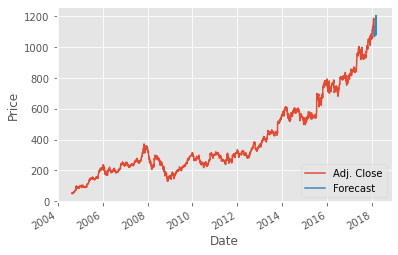

In [10]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()